<a href="https://colab.research.google.com/github/Anish-AV/Autoencoder/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

#try:
  # The %tensorflow_version magic only works in colab.
  # tensorflow_version 2.x
#except Exception:
#  pass
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


from tensorflow.keras.datasets import mnist

print('TensorFlow version:', tf.__version__)
print('Is Executing Eagerly?', tf.executing_eagerly())

TensorFlow version: 2.2.0-rc2
Is Executing Eagerly? True


## **BASE MODEL**




Epoch 1/100. Loss: 8.630229949951172
Epoch 2/100. Loss: 5.505133628845215
Epoch 3/100. Loss: 5.07551383972168
Epoch 4/100. Loss: 4.855296611785889
Epoch 5/100. Loss: 4.742985248565674
Epoch 6/100. Loss: 4.681737899780273
Epoch 7/100. Loss: 4.644071102142334
Epoch 8/100. Loss: 4.587369441986084
Epoch 9/100. Loss: 4.556818008422852
Epoch 10/100. Loss: 4.505757808685303
Epoch 11/100. Loss: 4.500783920288086
Epoch 12/100. Loss: 4.474051475524902
Epoch 13/100. Loss: 4.47385311126709
Epoch 14/100. Loss: 4.4467363357543945
Epoch 15/100. Loss: 4.398472309112549
Epoch 16/100. Loss: 4.397387981414795
Epoch 17/100. Loss: 4.4098124504089355
Epoch 18/100. Loss: 4.3915605545043945
Epoch 19/100. Loss: 4.368079662322998
Epoch 20/100. Loss: 4.383944511413574
Epoch 21/100. Loss: 4.381008148193359
Epoch 22/100. Loss: 4.380582809448242
Epoch 23/100. Loss: 4.3898091316223145
Epoch 24/100. Loss: 4.386039733886719
Epoch 25/100. Loss: 4.354583263397217
Epoch 26/100. Loss: 4.348464012145996
Epoch 27/100. Loss:

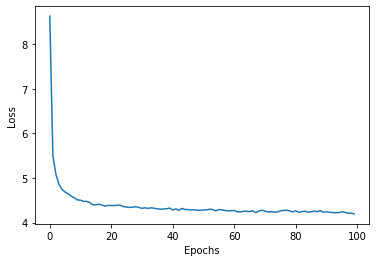

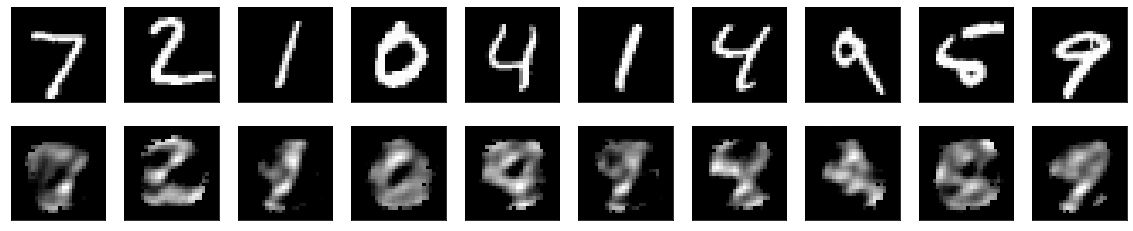

In [21]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

class Decoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = Encoder(intermediate_dim=intermediate_dim)
    self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

def loss(preds, real):
  return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

def train(loss, model, opt, original):
  with tf.GradientTape() as tape:
    preds = model(original)
    reconstruction_error = loss(preds, original)
  gradients = tape.gradient(reconstruction_error, model.trainable_variables)
  gradient_variables = zip(gradients, model.trainable_variables)
  opt.apply_gradients(gradient_variables)
  
  return reconstruction_error

def train_loop(model, opt, loss, dataset, epochs):
  for epoch in range(epochs):
    epoch_loss = 0
    for step, batch_features in enumerate(dataset):
      loss_values = train(loss, model, opt, batch_features)
      epoch_loss += loss_values
    model.loss.append(epoch_loss)
    print('Epoch {}/{}. Loss: {}'.format(epoch + 1, epochs, epoch_loss.numpy()))
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train / 255.

x_train = x_train.astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(256)

model = Autoencoder(intermediate_dim=128, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)
train_loop(model, opt, loss, training_dataset, 100)

plt.plot(range(100), model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## **INCREASING THE NUMBER OF LAYERS**

Epoch 1/100. Loss: 12.016135215759277
Epoch 2/100. Loss: 7.665579795837402
Epoch 3/100. Loss: 6.599884033203125
Epoch 4/100. Loss: 5.985152721405029
Epoch 5/100. Loss: 5.605352401733398
Epoch 6/100. Loss: 5.209237098693848
Epoch 7/100. Loss: 5.038447380065918
Epoch 8/100. Loss: 4.8618292808532715
Epoch 9/100. Loss: 4.763729095458984
Epoch 10/100. Loss: 4.665786266326904
Epoch 11/100. Loss: 4.5991435050964355
Epoch 12/100. Loss: 4.602227687835693
Epoch 13/100. Loss: 4.500114440917969
Epoch 14/100. Loss: 4.527431011199951
Epoch 15/100. Loss: 4.483517169952393
Epoch 16/100. Loss: 4.405885696411133
Epoch 17/100. Loss: 4.388101577758789
Epoch 18/100. Loss: 4.361225605010986
Epoch 19/100. Loss: 4.350255012512207
Epoch 20/100. Loss: 4.3372039794921875
Epoch 21/100. Loss: 4.314842700958252
Epoch 22/100. Loss: 4.2635369300842285
Epoch 23/100. Loss: 4.270761966705322
Epoch 24/100. Loss: 4.271515369415283
Epoch 25/100. Loss: 4.227436542510986
Epoch 26/100. Loss: 4.23374605178833
Epoch 27/100. Los

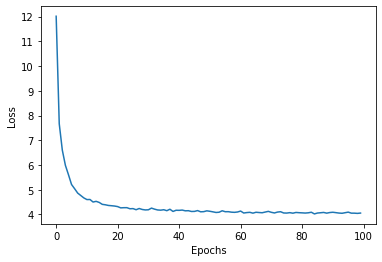

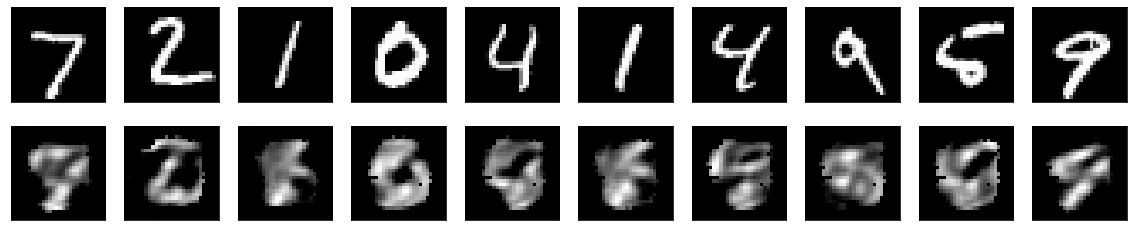

In [23]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer1 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    
    def call(self, input_features):

        activation1 = self.hidden_layer1(input_features)
        activation2 = self.hidden_layer2(activation1)
        return self.output_layer(activation2)

class Decoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer1 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation1 = self.hidden_layer1(code)
        activation2 = self.hidden_layer2(activation1)
        return self.output_layer(activation2)

class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = Encoder(intermediate_dim=intermediate_dim)
    self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

def loss(preds, real):
  return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

def train(loss, model, opt, original):
  with tf.GradientTape() as tape:
    preds = model(original)
    reconstruction_error = loss(preds, original)
  gradients = tape.gradient(reconstruction_error, model.trainable_variables)
  gradient_variables = zip(gradients, model.trainable_variables)
  opt.apply_gradients(gradient_variables)
  
  return reconstruction_error

def train_loop(model, opt, loss, dataset, epochs):
  for epoch in range(epochs):
    epoch_loss = 0
    for step, batch_features in enumerate(dataset):
      loss_values = train(loss, model, opt, batch_features)
      epoch_loss += loss_values
    model.loss.append(epoch_loss)
    print('Epoch {}/{}. Loss: {}'.format(epoch + 1, epochs, epoch_loss.numpy()))
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train / 255.

x_train = x_train.astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(256)

model = Autoencoder(intermediate_dim=128, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)
train_loop(model, opt, loss, training_dataset, 100)

plt.plot(range(100), model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## **INCREASING THE NUMBER OF LAYERS BY 1 AND CHANGING THE DIMENSION**

Epoch 1/100. Loss: 12.253006935119629
Epoch 2/100. Loss: 8.61400032043457
Epoch 3/100. Loss: 7.757177352905273
Epoch 4/100. Loss: 7.342344284057617
Epoch 5/100. Loss: 7.152401447296143
Epoch 6/100. Loss: 7.052702903747559
Epoch 7/100. Loss: 6.957362174987793
Epoch 8/100. Loss: 6.929192543029785
Epoch 9/100. Loss: 6.878133296966553
Epoch 10/100. Loss: 6.801372051239014
Epoch 11/100. Loss: 6.743061065673828
Epoch 12/100. Loss: 6.716156482696533
Epoch 13/100. Loss: 6.686221122741699
Epoch 14/100. Loss: 6.614788055419922
Epoch 15/100. Loss: 6.57794189453125
Epoch 16/100. Loss: 6.576041221618652
Epoch 17/100. Loss: 6.558328628540039
Epoch 18/100. Loss: 6.511836528778076
Epoch 19/100. Loss: 6.5055766105651855
Epoch 20/100. Loss: 6.493391990661621
Epoch 21/100. Loss: 6.482794761657715
Epoch 22/100. Loss: 6.485761642456055
Epoch 23/100. Loss: 6.468595027923584
Epoch 24/100. Loss: 6.469066619873047
Epoch 25/100. Loss: 6.452488899230957
Epoch 26/100. Loss: 6.440783500671387
Epoch 27/100. Loss: 6

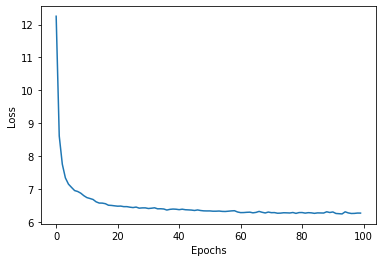

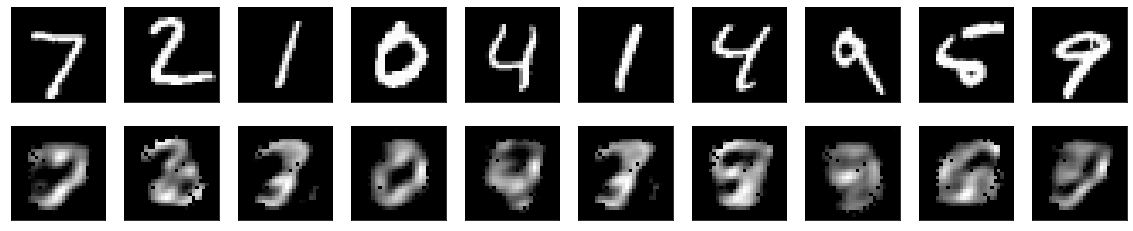

In [25]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer1 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    
    def call(self, input_features):

        activation1 = self.hidden_layer1(input_features)
        activation2 = self.hidden_layer2(activation1)
        return self.output_layer(activation2)

class Decoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer1 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation1 = self.hidden_layer1(code)
        activation2 = self.hidden_layer2(activation1)
        return self.output_layer(activation2)

class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = Encoder(intermediate_dim=intermediate_dim)
    self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

def loss(preds, real):
  return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

def train(loss, model, opt, original):
  with tf.GradientTape() as tape:
    preds = model(original)
    reconstruction_error = loss(preds, original)
  gradients = tape.gradient(reconstruction_error, model.trainable_variables)
  gradient_variables = zip(gradients, model.trainable_variables)
  opt.apply_gradients(gradient_variables)
  
  return reconstruction_error

def train_loop(model, opt, loss, dataset, epochs):
  for epoch in range(epochs):
    epoch_loss = 0
    for step, batch_features in enumerate(dataset):
      loss_values = train(loss, model, opt, batch_features)
      epoch_loss += loss_values
    model.loss.append(epoch_loss)
    print('Epoch {}/{}. Loss: {}'.format(epoch + 1, epochs, epoch_loss.numpy()))
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train / 255.

x_train = x_train.astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(256)

model = Autoencoder(intermediate_dim=32, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)
train_loop(model, opt, loss, training_dataset, 100)

plt.plot(range(100), model.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()